In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy as so
import scipy.signal as sg
from scipy.signal import correlate
%matplotlib inline
from scipy import fftpack
from scipy import signal
import math
import seaborn as sns
import pickle

In [172]:
d201806=pd.read_csv('201806.csv')
d201809=pd.read_csv('201809.csv')
d201812=pd.read_csv('201812.csv')
d201903=pd.read_csv('201903.csv')
d201906=pd.read_csv('201906.csv')

In [173]:
d201806['利用者氏名'].head()

0    落合信子
1    田所利子
2    鈴木敏子
3     関利江
4    渡邊賢一
Name: 利用者氏名, dtype: object

In [174]:
dic={}

In [175]:
for i in range(len(d201806)):
    dic[d201806['利用者氏名'][i]]={'201806':None,'201809':None,'201812':None,'201903':None,'201906':None}
for i in range(len(d201809)):
    dic[d201809['利用者氏名'][i]]={'201806':None,'201809':None,'201812':None,'201903':None,'201906':None}
for i in range(len(d201812)):
    dic[d201812['利用者氏名'][i]]={'201806':None,'201809':None,'201812':None,'201903':None,'201906':None}
for i in range(len(d201903)):
    dic[d201903['利用者氏名'][i]]={'201806':None,'201809':None,'201812':None,'201903':None,'201906':None}
for i in range(len(d201906)):
    dic[d201906['利用者氏名'][i]]={'201806':None,'201809':None,'201812':None,'201903':None,'201906':None}

In [176]:
dic

{'落合信子': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '田所利子': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '鈴木敏子': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '関利江': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '渡邊賢一': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '岡村はぎの': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '高津久代': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '五十嵐治美': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '今野巌': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '舛岡良子': {'201806': None,
  '201809': None,
  '201812': None,
  '201903': None,
  '201906': None},
 '石橋初子': {

In [177]:
for k in range(len(d201806['利用者氏名'])):
    for l in dic.keys():
        if d201806['利用者氏名'][k]==l:
            dic[l]['201806']=d201806[k:k+1]
            
for k in range(len(d201809['利用者氏名'])):
    for l in dic.keys():
        if d201809['利用者氏名'][k]==l:
            dic[l]['201809']=d201809[k:k+1]
            
for k in range(len(d201812['利用者氏名'])):
    for l in dic.keys():
        if d201812['利用者氏名'][k]==l:
            dic[l]['201812']=d201812[k:k+1]
            
for k in range(len(d201903['利用者氏名'])):
    for l in dic.keys():
        if d201903['利用者氏名'][k]==l:
            dic[l]['201903']=d201903[k:k+1]

for k in range(len(d201906['利用者氏名'])):
    for l in dic.keys():
        if d201906['利用者氏名'][k]==l:
            dic[l]['201906']=d201906[k:k+1]

In [178]:
#保存方法
f = open('sample.textfile','wb')
pickle.dump(dic,f)
f.close

<function BufferedWriter.close>

In [179]:
#読み込み方法
f = open('sample.textfile','rb')
test=pickle.load(f)

In [180]:
#検索方法
test['佐藤弘']['201903']['握力利き手']

26    23.2
Name: 握力利き手, dtype: float64

In [181]:
test

{'落合信子': {'201806':    Unnamed: 0 利用者氏名          測定月   age  gender  握力利き手  右片足立ち  左片足立ち  5m歩行通常  \
  0           1  落合信子  平成30年6月(前回）  83.0     1.0   24.0   18.3   10.2     3.5   
  
     ５ｍ歩行最大  TUG    FR  CS-30     身長    体重   BMI   筋肉量  体水分量  推定骨量   基礎代謝量  
  0     3.4  6.9  30.0   11.0  159.4  48.5  19.1  36.0  24.0   2.2  1053.0  ,
  '201809':    Unnamed: 0 利用者氏名          測定月   age  gender  握力利き手  右片足立ち  左片足立ち  5m歩行通常  \
  0           1  落合信子  平成30年9月（今回）  83.0     1.0   20.0   21.4   14.8     4.2   
  
     ５ｍ歩行最大  ...   基礎代謝量                                備考欄（補装具、体調など）   月  火  \
  0     3.3  ...  1094.0  片足立ちバランスが両側共に改善しています。下肢筋力も改善しました。　※FRは今回未測定 NaN  ○   
  
       水    木    金    土         備考１  備考2  
  0  NaN  NaN  NaN  NaN  2018年4月～開始  NaN  
  
  [1 rows x 29 columns],
  '201812':    Unnamed: 0 利用者氏名           測定月  age  gender  握力利き手  右片足立ち  左片足立ち  5m歩行通常  \
  0           1  落合信子  平成30年12月（今回）   83       1     24    7.2   16.9     3.8   
  
     ５ｍ歩行最大  ...   基礎代謝量           

28.7
25.0
27.0
25.1
27.5


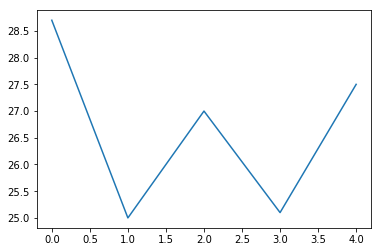

In [182]:
#関利江さんの握力の変化をグラフ化
seki=list()
for o in test['関利江'].keys():
    print(float(test['関利江'][o]['握力利き手']))
    seki.append(float(test['関利江'][o]['握力利き手']))
plt.plot(seki)

In [183]:
test['関利江']['201906'].columns
#param='右片足立ち'

Index(['Unnamed: 0', '利用者氏名', '測定月', 'age', 'gender', '握力利き手', '右片足立ち',
       '左片足立ち', '5m歩行通常', '５ｍ歩行最大', 'TUG', 'FR', 'CS-30', '身長', '体重', 'BMI',
       '筋肉量', '体水分量', '推定骨量', '基礎代謝量', '月', '火', '水', '木', '金', '土', '開始日',
       '備考2'],
      dtype='object')

In [184]:
#全員分の握力の変化をグラフ化
array=pd.DataFrame(index=list(test['関利江'].keys()), columns=list(test.keys()) )
for al1 in test.keys():
    insert=[]
    for al2 in test[al1].keys():
        if (test[al1][al2] is None):
            insert.append(np.nan)
        else:
            insert.append( float(test[al1][al2]['CS-30']) )
    array[al1]=insert 

In [185]:
array

,落合信子,田所利子,鈴木敏子,関利江,渡邊賢一,岡村はぎの,高津久代,五十嵐治美,今野巌,舛岡良子,...,飯島照子,天野ツル,高野伴子,池田幸枝,池田和雄,長嶋若子,小田まゆみ,波形キミ,廣井由利子,佐久間照子
201806,11.0,15.0,NaN,17.0,19.0,17.0,20.0,NaN,17.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201809,18.0,15.0,15.0,9.0,13.0,17.0,19.0,12.0,21.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201812,13.0,17.0,13.0,17.0,19.0,18.0,19.0,15.0,19.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201903,18.0,NaN,17.0,15.0,14.0,21.0,20.0,17.0,16.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201906,17.0,20.0,17.0,19.0,NaN,30.0,22.0,18.0,11.0,11.0,...,17.0,15.0,12.0,14.0,17.0,19.0,25.0,23.0,19.0,20.0


In [186]:
array.count(axis=1)

201806    15
201809    18
201812    23
201903    28
201906    40
dtype: int64

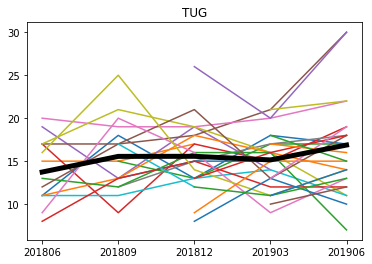

In [187]:
plt.plot(array)
plt.title('TUG')
plt.plot(array.mean(axis=1), lw=5, color='black')
#plt.ylim(-1,20)
plt.show()

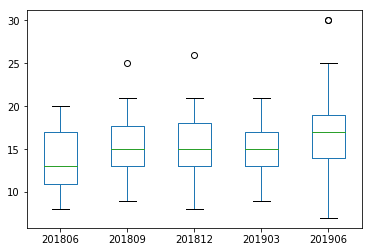

In [188]:
array.T.plot.box()
#array['関利江'].T.plot.box()

In [189]:
#cut off による分類法
test.keys()

dict_keys(['落合信子', '田所利子', '鈴木敏子', '関利江', '渡邊賢一', '岡村はぎの', '高津久代', '五十嵐治美', '今野巌', '舛岡良子', '石橋初子', '大久保イツ', '大竹真理子', '根本公子', '森幸', '志村時枝', '及川吉夫', '深見喜久郎', '矢口かつ子', '今野幸雄', '服部吉枝', '田中初美', '清水政子', '大岩昌子', '佐藤弘', '山口くに子', '井上登志子', '星野紀子', '山崎千代子', '佐藤妙子', '中嶋洋次', '鰐川政子', '井上泰子', '竹本正恵', '藤城ヒサ子', '渡辺喜久子', '飯島照子', '天野ツル', '高野伴子', '池田幸枝', '池田和雄', '長嶋若子', '小田まゆみ', '波形キミ', '廣井由利子', '佐久間照子'])

In [196]:
#cut off による分類法: 年齢：８０歳以上か, 性別：女性, 握力利き手: 男性なら２６kg未満で、女性なら１８kg未満, 
#右片足立ち, 左片足立ち：5秒未満, 5m歩行通常, ５ｍ歩行最大 ：　6.2秒未満, TUG：13.5 秒, FR：１５cm, CS-30：１４

state=np.zeros((0,10))
s1,s2,s3,s4,s5,s6,s7,s8=0,0,0,0,0,0,0,0
for u0 in test.keys():
    for u1 in test[u0].keys():
        if (test[u0][u1] is None):
            pass 
        else:
            s1,s2,s3,s4,s5,s6,s7,s8=0,0,0,0,0,0,0,0
            for u2 in test[u0][u1].keys():
                print(u0,u1,u2)
                #age
                if (float(test[u0][u1]['age']) > 80):
                    s1=1
                
                #gender
               # print(test[u0][u1]['gender'])
                if (float(test[u0][u1]['gender']) == 1):
                    s2=1                  
                
                #grip power
                if (float(test[u0][u1]['gender']) == 1 and float(test[u0][u1]['握力利き手']) < 18):
                    s3=1  
                if (float(test[u0][u1]['gender']) == 0 and float(test[u0][u1]['握力利き手']) < 26):
                    s3=1
            
                #OLS
                if (float(test[u0][u1]['右片足立ち']) < 5):
                    s4=1        
                if (float(test[u0][u1]['左片足立ち']) < 5):
                    s4=1  
            
                #5m
                if (float(test[u0][u1]['５ｍ歩行最大']) < 6.2):
                    s5=1        
            
                #TUG
                if (float(test[u0][u1]['TUG']) < 13.5):
                    s6=1       
            
                #FR
                if (float(test[u0][u1]['FR']) < 15):
                    s7=1     
            
                #CS-30
                if (float(test[u0][u1]['CS-30']) < 14):
                    s8=1     
            
            #1が多いほど悪化している
            state=np.append(state, np.array([[u0, u1, s1, s2, s3, s4, s5, s6, s7, s8]]), axis=0)

落合信子 201806 Unnamed: 0
落合信子 201806 利用者氏名
落合信子 201806 測定月
落合信子 201806 age
落合信子 201806 gender
落合信子 201806 握力利き手
落合信子 201806 右片足立ち
落合信子 201806 左片足立ち
落合信子 201806 5m歩行通常
落合信子 201806 ５ｍ歩行最大
落合信子 201806 TUG
落合信子 201806 FR
落合信子 201806 CS-30
落合信子 201806 身長
落合信子 201806 体重
落合信子 201806 BMI
落合信子 201806 筋肉量
落合信子 201806 体水分量
落合信子 201806 推定骨量
落合信子 201806 基礎代謝量
落合信子 201809 Unnamed: 0
落合信子 201809 利用者氏名
落合信子 201809 測定月
落合信子 201809 age
落合信子 201809 gender
落合信子 201809 握力利き手
落合信子 201809 右片足立ち
落合信子 201809 左片足立ち
落合信子 201809 5m歩行通常
落合信子 201809 ５ｍ歩行最大
落合信子 201809 TUG
落合信子 201809 FR
落合信子 201809 CS-30
落合信子 201809 身長
落合信子 201809 体重
落合信子 201809 BMI
落合信子 201809 筋肉量
落合信子 201809 体水分量
落合信子 201809 （9月）推定骨量
落合信子 201809 基礎代謝量
落合信子 201809 備考欄（補装具、体調など）
落合信子 201809 月
落合信子 201809 火
落合信子 201809 水
落合信子 201809 木
落合信子 201809 金
落合信子 201809 土
落合信子 201809 備考１
落合信子 201809 備考2
落合信子 201812 Unnamed: 0
落合信子 201812 利用者氏名
落合信子 201812 測定月
落合信子 201812 age
落合信子 201812 gender
落合信子 201812 握力利き手
落合信子 201812 右片足立ち
落合信子 201812 左片足立ち
落合信子 201812 5m

岡村はぎの 201809 FR
岡村はぎの 201809 CS-30
岡村はぎの 201809 身長
岡村はぎの 201809 体重
岡村はぎの 201809 BMI
岡村はぎの 201809 筋肉量
岡村はぎの 201809 体水分量
岡村はぎの 201809 （9月）推定骨量
岡村はぎの 201809 基礎代謝量
岡村はぎの 201809 備考欄（補装具、体調など）
岡村はぎの 201809 月
岡村はぎの 201809 火
岡村はぎの 201809 水
岡村はぎの 201809 木
岡村はぎの 201809 金
岡村はぎの 201809 土
岡村はぎの 201809 備考１
岡村はぎの 201809 備考2
岡村はぎの 201812 Unnamed: 0
岡村はぎの 201812 利用者氏名
岡村はぎの 201812 測定月
岡村はぎの 201812 age
岡村はぎの 201812 gender
岡村はぎの 201812 握力利き手
岡村はぎの 201812 右片足立ち
岡村はぎの 201812 左片足立ち
岡村はぎの 201812 5m歩行通常
岡村はぎの 201812 ５ｍ歩行最大
岡村はぎの 201812 TUG
岡村はぎの 201812 FR
岡村はぎの 201812 CS-30
岡村はぎの 201812 身長
岡村はぎの 201812 体重
岡村はぎの 201812 BMI
岡村はぎの 201812 筋肉量
岡村はぎの 201812 体水分量
岡村はぎの 201812 推定骨量
岡村はぎの 201812 基礎代謝量
岡村はぎの 201812 備考欄（補装具、体調など）
岡村はぎの 201812 月
岡村はぎの 201812 火
岡村はぎの 201812 水
岡村はぎの 201812 木
岡村はぎの 201812 金
岡村はぎの 201812 土
岡村はぎの 201812 備考１
岡村はぎの 201812 備考2
岡村はぎの 201903 Unnamed: 0
岡村はぎの 201903 利用者氏名
岡村はぎの 201903 測定月
岡村はぎの 201903 age
岡村はぎの 201903 gender
岡村はぎの 201903 握力利き手
岡村はぎの 201903 右片足立ち
岡村はぎの 201903 左片足立ち
岡村はぎの 201903 5m歩行

大久保イツ 201809 FR
大久保イツ 201809 CS-30
大久保イツ 201809 身長
大久保イツ 201809 体重
大久保イツ 201809 BMI
大久保イツ 201809 筋肉量
大久保イツ 201809 体水分量
大久保イツ 201809 （9月）推定骨量
大久保イツ 201809 基礎代謝量
大久保イツ 201809 備考欄（補装具、体調など）
大久保イツ 201809 月
大久保イツ 201809 火
大久保イツ 201809 水
大久保イツ 201809 木
大久保イツ 201809 金
大久保イツ 201809 土
大久保イツ 201809 備考１
大久保イツ 201809 備考2
大久保イツ 201812 Unnamed: 0
大久保イツ 201812 利用者氏名
大久保イツ 201812 測定月
大久保イツ 201812 age
大久保イツ 201812 gender
大久保イツ 201812 握力利き手
大久保イツ 201812 右片足立ち
大久保イツ 201812 左片足立ち
大久保イツ 201812 5m歩行通常
大久保イツ 201812 ５ｍ歩行最大
大久保イツ 201812 TUG
大久保イツ 201812 FR
大久保イツ 201812 CS-30
大久保イツ 201812 身長
大久保イツ 201812 体重
大久保イツ 201812 BMI
大久保イツ 201812 筋肉量
大久保イツ 201812 体水分量
大久保イツ 201812 推定骨量
大久保イツ 201812 基礎代謝量
大久保イツ 201812 備考欄（補装具、体調など）
大久保イツ 201812 月
大久保イツ 201812 火
大久保イツ 201812 水
大久保イツ 201812 木
大久保イツ 201812 金
大久保イツ 201812 土
大久保イツ 201812 備考１
大久保イツ 201812 備考2
大久保イツ 201903 Unnamed: 0
大久保イツ 201903 利用者氏名
大久保イツ 201903 測定月
大久保イツ 201903 age
大久保イツ 201903 gender
大久保イツ 201903 握力利き手
大久保イツ 201903 右片足立ち
大久保イツ 201903 左片足立ち
大久保イツ 201903 5m歩行

及川吉夫 201903 基礎代謝量
及川吉夫 201903 備考欄（補装具、体調など）
及川吉夫 201903 月
及川吉夫 201903 火
及川吉夫 201903 水
及川吉夫 201903 木
及川吉夫 201903 金
及川吉夫 201903 土
及川吉夫 201903 備考１
及川吉夫 201903 備考2
及川吉夫 201906 Unnamed: 0
及川吉夫 201906 利用者氏名
及川吉夫 201906 測定月
及川吉夫 201906 age
及川吉夫 201906 gender
及川吉夫 201906 握力利き手
及川吉夫 201906 右片足立ち
及川吉夫 201906 左片足立ち
及川吉夫 201906 5m歩行通常
及川吉夫 201906 ５ｍ歩行最大
及川吉夫 201906 TUG
及川吉夫 201906 FR
及川吉夫 201906 CS-30
及川吉夫 201906 身長
及川吉夫 201906 体重
及川吉夫 201906 BMI
及川吉夫 201906 筋肉量
及川吉夫 201906 体水分量
及川吉夫 201906 推定骨量
及川吉夫 201906 基礎代謝量
及川吉夫 201906 月
及川吉夫 201906 火
及川吉夫 201906 水
及川吉夫 201906 木
及川吉夫 201906 金
及川吉夫 201906 土
及川吉夫 201906 開始日
及川吉夫 201906 備考2
深見喜久郎 201806 Unnamed: 0
深見喜久郎 201806 利用者氏名
深見喜久郎 201806 測定月
深見喜久郎 201806 age
深見喜久郎 201806 gender
深見喜久郎 201806 握力利き手
深見喜久郎 201806 右片足立ち
深見喜久郎 201806 左片足立ち
深見喜久郎 201806 5m歩行通常
深見喜久郎 201806 ５ｍ歩行最大
深見喜久郎 201806 TUG
深見喜久郎 201806 FR
深見喜久郎 201806 CS-30
深見喜久郎 201806 身長
深見喜久郎 201806 体重
深見喜久郎 201806 BMI
深見喜久郎 201806 筋肉量
深見喜久郎 201806 体水分量
深見喜久郎 201806 推定骨量
深見喜久郎 201806 基礎代謝量
深見喜久郎 2018

星野紀子 201903 体水分量
星野紀子 201903 推定骨量
星野紀子 201903 基礎代謝量
星野紀子 201903 備考欄（補装具、体調など）
星野紀子 201903 月
星野紀子 201903 火
星野紀子 201903 水
星野紀子 201903 木
星野紀子 201903 金
星野紀子 201903 土
星野紀子 201903 備考１
星野紀子 201903 備考2
星野紀子 201906 Unnamed: 0
星野紀子 201906 利用者氏名
星野紀子 201906 測定月
星野紀子 201906 age
星野紀子 201906 gender
星野紀子 201906 握力利き手
星野紀子 201906 右片足立ち
星野紀子 201906 左片足立ち
星野紀子 201906 5m歩行通常
星野紀子 201906 ５ｍ歩行最大
星野紀子 201906 TUG
星野紀子 201906 FR
星野紀子 201906 CS-30
星野紀子 201906 身長
星野紀子 201906 体重
星野紀子 201906 BMI
星野紀子 201906 筋肉量
星野紀子 201906 体水分量
星野紀子 201906 推定骨量
星野紀子 201906 基礎代謝量
星野紀子 201906 月
星野紀子 201906 火
星野紀子 201906 水
星野紀子 201906 木
星野紀子 201906 金
星野紀子 201906 土
星野紀子 201906 開始日
星野紀子 201906 備考2
山崎千代子 201903 Unnamed: 0
山崎千代子 201903 利用者氏名
山崎千代子 201903 測定月
山崎千代子 201903 age
山崎千代子 201903 gender
山崎千代子 201903 握力利き手
山崎千代子 201903 右片足立ち
山崎千代子 201903 左片足立ち
山崎千代子 201903 5m歩行通常
山崎千代子 201903 ５ｍ歩行最大
山崎千代子 201903 TUG
山崎千代子 201903 FR
山崎千代子 201903 CS-30
山崎千代子 201903 身長
山崎千代子 201903 体重
山崎千代子 201903 BMI
山崎千代子 201903 筋肉量
山崎千代子 201903 体水分量
山崎千代子 201903 

In [197]:
df1 = pd.DataFrame(state)
df1.columns = ['name','date','age','gender', 'grip power', 'OLS', '5m', 'TUG', 'FR', 'CS-30']

In [198]:
df1.to_csv("classification.csv", encoding="shift_jis" )

In [195]:
test['落合信子']['201806']

,Unnamed: 0,利用者氏名,測定月,age,gender,握力利き手,右片足立ち,左片足立ち,5m歩行通常,５ｍ歩行最大,TUG,FR,CS-30,身長,体重,BMI,筋肉量,体水分量,推定骨量,基礎代謝量
0,1,落合信子,平成30年6月(前回）,83.0,1.0,24.0,18.3,10.2,3.5,3.4,6.9,30.0,11.0,159.4,48.5,19.1,36.0,24.0,2.2,1053.0
